Simple example of a logistic regression model using scikit-learn.

Let's use a small dataset where the goal is to predict whether a student will pass (1) or fail (0) an exam based on the number of hours they studied.

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [22]:

# Create a simple dataset
data = {
    'hours_studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'passed': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}


In [23]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(data)


In [24]:
# Extract features and target
X = df[['hours_studied']].values
y = df['passed'].values
print("y:\n",y)
print("y:\n",X)

y:
 [0 0 0 0 0 1 1 1 1 1]
y:
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
# Initialize the logistic regression model
log_reg = LogisticRegression()


In [27]:

# Fit the model to the training data
log_reg.fit(X_train, y_train)


LogisticRegression()

In [28]:

# Predict the labels for the test data
y_pred = log_reg.predict(X_test)


In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [30]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6666666666666666
Confusion Matrix:
[[1 0]
 [1 1]]


In [31]:
# Predict the probability of passing for a new student who studied for 7.5 hours
new_data = np.array([[7.5]])
predicted_proba = log_reg.predict_proba(new_data)
predicted_class = log_reg.predict(new_data)

In [32]:

print(f"Predicted probability of passing: {predicted_proba[0][1]:.2f}")
print(f"Predicted class: {predicted_class[0]}")


Predicted probability of passing: 0.83
Predicted class: 1


In [33]:

# Predict probabilities for plotting
X_plot = np.linspace(0, 11, 300).reshape(-1, 1)
y_plot_proba = log_reg.predict_proba(X_plot)[:, 1]


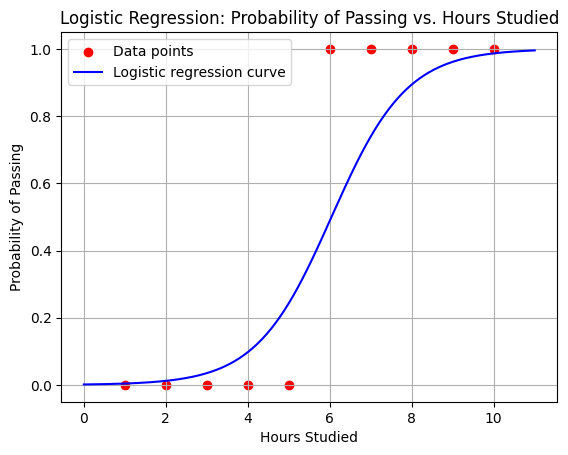

In [34]:
# Plot the data points and the logistic regression curve
plt.scatter(X, y, color='red', label='Data points')
plt.plot(X_plot, y_plot_proba, color='blue', label='Logistic regression curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Probability of Passing vs. Hours Studied')
plt.legend()
plt.grid(True)
plt.show()